# Final Project 

## Machine Learning and Foundations with Python, 90-803 - Spring 2024

### Name: Sharon John

### Due Date: April 29th 2024

## Question 1:
## What is the relationship between various socio-economic factors and the share of female STEM graduates over time, and can these factors predict future trends in the proportion of women entering STEM fields?

In [1]:
#import packages

# general
import numpy as np
import pandas as pd
import time

# sklearn
# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score

# visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
#load in the dataset
df = pd.read_csv('transformed_data.csv')
df.head()

,Unnamed: 0,Year,A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),A woman can travel outside her home in the same way as a man (1=yes; 0=no),...,Country Name_Ukraine,Country Name_United Arab Emirates,Country Name_United Kingdom,Country Name_United States,Country Name_Uruguay,Country Name_Uzbekistan,"Country Name_Venezuela, RB",Country Name_Viet Nam,Country Name_West Bank and Gaza,Country Name_Zimbabwe
0,0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,-0.7,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,4,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#remove the country columns so that we can focus on more important predictors

columns_to_remove = set()
prev_prefix = 'Country'

for col in df.columns:
    prefix = col.split('_')[0]
    
    if prefix == prev_prefix:
        columns_to_remove.add(col)
    
    prev_prefix = prefix

df = df.drop(columns=columns_to_remove)
df = df.drop(columns=['Country Name_Algeria', 'Unnamed: 0'])
df

,Year,A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),A woman can travel outside her home in the same way as a man (1=yes; 0=no),A woman can work at night in the same way as a man (1=yes; 0=no),...,The law is free of legal provisions that require a married woman to obey her husband (1=yes; 0=no),The law prohibits discrimination in access to credit based on gender (1=yes; 0=no),The law prohibits discrimination in employment based on gender (1=yes; 0=no),The law provides for the valuation of nonmonetary contributions (1=yes; 0=no),The mandatory retirement age for men and women is the same (1=yes; 0=no),There are periods of absence due to childcare accounted for in pension benefits (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),"Vocational and Technical enrolment (% of total secondary enrolment), total",Share of STEM Graduates
0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,-0.623169,-0.123466
1,-0.7,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,-0.560996,0.884704
2,0.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.553385,1.215693
3,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.447417,1.619732
4,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.445124,1.235555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0.8,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.798411,0.890969
1067,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,-1.181184
1068,0.1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,-0.614411
1069,0.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,-0.595872


In [4]:
# # create X and y dataframes
X = df.drop(columns=['Year', 'Share of STEM Graduates'])  # Features except Year and Share of STEM Graduates
y = df['Share of STEM Graduates']  # Target variable (proportion of female STEM graduates)

In [5]:
# #split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
y_test

396   -0.724499
227    0.373087
673    0.698001
702    0.690436
643   -0.198359
         ...   
35    -0.187206
870   -2.901920
503   -0.406601
472    0.413398
211    0.321537
Name: Share of STEM Graduates, Length: 215, dtype: float64

## Choosing the Best parameters

In [6]:
#initialize sfs, use linear regression as the baseline model for this question
sfs = SequentialFeatureSelector(estimator = LinearRegression(),
                                n_features_to_select = "auto",
                                direction = 'forward',
                                scoring = 'neg_mean_squared_error',
                                cv = 5, n_jobs =-1)

# fit the data to sfs
sfs = sfs.fit(X_train, y_train)

#  #retrieve the and print the names of the selected features
feature_names = np.array(X.columns.difference(['Share of STEM Graduates']))
selected_feature_names = feature_names[sfs.get_support()].tolist()
print("Selected features:", selected_feature_names)

#  transform X_train and X_test to include only the selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

#display the shape of transformed X_train_selected and X_test_selected
print("Transformed X_train shape:", X_train_selected.shape)
print("Transformed X_test shape:", X_test_selected.shape)

Selected features: ['A woman can be head of household in the same way as a man (1=yes; 0=no)', 'A woman can choose where to live in the same way as a man (1=yes; 0=no)', 'A woman can work at night in the same way as a man (1=yes; 0=no)', 'Age dependency ratio (% of working-age population)', 'Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no)', 'Dismissal of pregnant workers is prohibited (1=yes; 0=no)', 'Fertility rate, total (births per woman)', 'GDP (current US$)', 'GDP per capita (Current US$)', 'Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no)', 'Length of paid maternity leave (calendar days)', 'Length of paid paternity leave (calendar days)', 'Population ages 65 and above, female', 'Rural population (% of total population)', 'Secondary education, vocational pupils', 'Sons and daughters have equal rights to inherit assets from their parents (1=yes; 0=no)', 'The age at which men and women can retire

In [7]:
# Check the shapes of the training and testing sets to ensure consistency
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
# X_train_selected_array = X_train_selected.to_numpy()
# X_train_selected_array
# X_test_selected_array = X_test_selected.to_numpy()
# X_test_selected_array


Training set shape: (856, 51) (856,)
Testing set shape: (215, 51) (215,)


## Initial Baseline using Linear Regression

In [8]:

# Defining features and target variable
X = df.drop(columns=['Year', 'Share of STEM Graduates'])  # Features except Year and Share of STEM Graduates
y = df['Share of STEM Graduates']  # Target variable (proportion of female STEM graduates)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#making predictions on the training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#evaluate the model using MSE and R squared
mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)
r_sq_train = model.score(X_train, y_train)
r_sq_test = model.score(X_test, y_test)

#print the MSE and R_squared
print('MSE (Train): ', round(mse_train, 3))
print('MSE (Test): ', round(mse_test, 3))
print('R-Squared (Train): ', round(r_sq_train, 3))
print('R-Squared (Test): ', round(r_sq_test, 3))

# Getting the coefficients (indicating the importance of each feature)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Coefficients:")
print(coefficients)


MSE (Train):  0.497
MSE (Test):  0.553
R-Squared (Train):  0.363
R-Squared (Test):  0.204
Coefficients:
                                              Feature  Coefficient
0   A woman can be head of household in the same w...     0.240979
1   A woman can choose where to live in the same w...    -0.155496
2   A woman can get a job in the same way as a man...     0.033455
3   A woman can obtain a judgment of divorce in th...     0.075801
4   A woman can open a bank account in the same wa...    -0.456891
5   A woman can register a business in the same wa...    -0.250740
6   A woman can sign a contract in the same way as...    -0.021279
7   A woman can travel outside her home in the sam...     0.036033
8   A woman can work at night in the same way as a...    -0.350028
9   A woman can work in a job deemed dangerous in ...     0.065665
10  A woman can work in an industrial job in the s...     0.054372
11  A woman has the same rights to remarry as a ma...    -0.214798
12  Adolescent fertility 

The initial model does not perform with an r-squared of 0.363 for the training data and 0.204 for the test data. However, the lower test r-squared compared to the training r-squared suggests a potential issue with overfitting. Furthermore, the mean squared error (MSE) of the test data is higher than that of the training data. While this basic linear regression model shows an understandable performance for a baseline model, I will be exploring more sophisticated models will provide insights into potential improvements.

# Defining the function for model selection

In [9]:
# Define the function for model selection
def question1(model_type, X_train, y_train, X_test, y_test, use_selected_features=False):
    # Step 1: Initialize a model object
    if model_type == 'Linear Regression':
        model = LinearRegression()
    elif model_type == 'Ridge':
        model = Ridge()
    elif model_type == 'Random Forest':
        model = RandomForestRegressor()
    elif model_type == 'ElasticNet':
        model = ElasticNet()
    else:
        print('Please specify a valid model type')

    # Step 2: Train the model
    if use_selected_features:
        model.fit(X_train_selected, y_train)
        X_train = X_train_selected
        X_test = X_test_selected
    else:
        model.fit(X_train, y_train)

    # Step 3: Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Step 4: Evaluate the model performance
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r_sq_train = model.score(X_train, y_train)
    r_sq_test = model.score(X_test, y_test)

    # Round the results to three decimal places
    mse_train = round(mse_train, 3)
    mse_test = round(mse_test, 3)
    r_sq_train = round(r_sq_train, 3)
    r_sq_test = round(r_sq_test, 3)

    # Print the model performance metrics
    print('mse_train:', mse_train)
    print('mse_test:', mse_test)
    print('r_sq_train:', r_sq_train)
    print('r_sq_test:', r_sq_test)

    return mse_train, mse_test, r_sq_train, r_sq_test


## Model 1: Linear Regression 
### LR with selected features

In [10]:
#running the model with the selected features
print('Linear Regression:')
mse_train_lr_sf, mse_test_lr_sf, r_sq_train_lr_sf, r_sq_test_lr_sf = question1('Linear Regression', X_train_selected, y_train, X_test_selected, y_test)

Linear Regression:
mse_train: 0.753
mse_test: 0.735
r_sq_train: 0.035
r_sq_test: -0.058


### LR without selected Features

In [11]:
print('Linear Regression:')
mse_train_lr, mse_test_lr, r_sq_train_lr, r_sq_test_lr = question1('Linear Regression', X_train, y_train, X_test, y_test)

Linear Regression:
mse_train: 0.497
mse_test: 0.553
r_sq_train: 0.363
r_sq_test: 0.204


## Model 2: Ridge

### Ridge automatically chooses best features so using without Selected features

In [12]:
# Define the alpha parameter for Ridge regularization
#running the ridge model with the selected features
print('Ridge Model:')
mse_train_ridge, mse_test_ridge, r_sq_train_ridge, r_sq_test_ridge = question1('Ridge', X_train, y_train, X_test, y_test)
print('\n')

Ridge Model:
mse_train: 0.497
mse_test: 0.546
r_sq_train: 0.362
r_sq_test: 0.214




## Model 3: Random Forrest

### RF with selected features

In [13]:
#reshape the target variable
y_train_ensemble = y_train.values.ravel()
y_test_ensemble = y_test.values.ravel()

#running the random forest model with the selected features
print('Random Forest Regressor:')
mse_train_rf_sf, mse_test_rf_sf, r_sq_train_rf_sf, r_sq_test_rf_sf = question1('Random Forest', X_train_selected, y_train_ensemble, X_test_selected, y_test_ensemble)
print('\n')


Random Forest Regressor:
mse_train: 0.129
mse_test: 0.886
r_sq_train: 0.835
r_sq_test: -0.276




### RF without selected features

In [14]:
#reshape the target variable
y_train_ensemble = y_train.values.ravel()
y_test_ensemble = y_test.values.ravel()

#running the random forest model with the selected features
print('Random Forest Regressor:')
mse_train_rf, mse_test_rf, r_sq_train_rf, r_sq_test_rf = question1('Random Forest', X_train, y_train_ensemble, X_test, y_test_ensemble)
print('\n')


Random Forest Regressor:
mse_train: 0.034
mse_test: 0.249
r_sq_train: 0.956
r_sq_test: 0.641




## Model 4: ElasticNet

### EN with Selected Features

In [15]:
#running the elasticnet model with the selected features
print('ElasticNet Model:')
mse_train_en_sf, mse_test_en_sf, r_sq_train_en_sf, r_sq_test_en_sf = question1('ElasticNet', X_train_selected, y_train, X_test_selected, y_test)

ElasticNet Model:
mse_train: 0.78
mse_test: 0.695
r_sq_train: 0.0
r_sq_test: -0.0


### EN without Selected Features

In [16]:
#running the elasticnet model with the selected features
print('ElasticNet Model:')
mse_train_en, mse_test_en, r_sq_train_en, r_sq_test_en = question1('ElasticNet', X_train, y_train, X_test, y_test)

ElasticNet Model:
mse_train: 0.774
mse_test: 0.693
r_sq_train: 0.008
r_sq_test: 0.002


## Dataframe printing out all the models results

In [17]:

# Initialize a dictionary to store the results
data = {
    'Model': [],
    'Selected Features': [],
    'R Squared Train': [],
    'R Squared Test': [],
    'MSE Train': [],
    'MSE Test': []
}

# Define the model configurations
models = [
    ('Linear Regression', False),
    ('Linear Regression', True),
    ('Ridge', False),
    ('Random Forest', False),
    ('Random Forest', True),
    ('ElasticNet', False),
    ('ElasticNet', True)
]

# Loop through each model configuration
for model_config in models:
    model_type, use_selected_features = model_config
    mse_train, mse_test, r_sq_train, r_sq_test = question1(model_type, X_train, y_train, X_test, y_test, use_selected_features)
    
    # Append results to the dictionary
    data['Model'].append(model_type)
    data['Selected Features'].append('Yes' if use_selected_features else 'No')
    data['R Squared Train'].append(r_sq_train)
    data['R Squared Test'].append(r_sq_test)
    data['MSE Train'].append(mse_train)
    data['MSE Test'].append(mse_test)

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(data)
results_df

mse_train: 0.497
mse_test: 0.553
r_sq_train: 0.363
r_sq_test: 0.204
mse_train: 0.753
mse_test: 0.735
r_sq_train: 0.035
r_sq_test: -0.058
mse_train: 0.497
mse_test: 0.546
r_sq_train: 0.362
r_sq_test: 0.214
mse_train: 0.035
mse_test: 0.243
r_sq_train: 0.955
r_sq_test: 0.651
mse_train: 0.133
mse_test: 0.893
r_sq_train: 0.829
r_sq_test: -0.286
mse_train: 0.774
mse_test: 0.693
r_sq_train: 0.008
r_sq_test: 0.002
mse_train: 0.78
mse_test: 0.695
r_sq_train: 0.0
r_sq_test: -0.0


,Model,Selected Features,R Squared Train,R Squared Test,MSE Train,MSE Test
0,Linear Regression,No,0.363,0.204,0.497,0.553
1,Linear Regression,Yes,0.035,-0.058,0.753,0.735
2,Ridge,No,0.362,0.214,0.497,0.546
3,Random Forest,No,0.955,0.651,0.035,0.243
4,Random Forest,Yes,0.829,-0.286,0.133,0.893
5,ElasticNet,No,0.008,0.002,0.774,0.693
6,ElasticNet,Yes,0.000,-0.000,0.780,0.695


#### Note: 
From the above sections, you will notice that I have tried with and without the selected features. The reason for this is becuase, I talked to professor GS, multiple TA's, removed countries, tried different SFS paramaters and suprisingly the features selected values made my models perform worse.So for the sake of my model, I will be using data that is not using feature selection. However, for the dataframe has all the values to take into consideration.

#### Result: 
None of the models performed well with the selected features suprisingly. But from all of them Ridge performed the best despite slight overfitting. The RF's MSE is exceptionally low which is great and has a descent R squared Train of 0.94 and R squared test of 0.65.

In summary, Ridge regression appears to be the most robust model among the ones tested, with consistent performance regardless of feature selection. Random Forest performs exceptionally well without feature selection but suffers from poor performance when selected features are used. Linear regression and ElasticNet exhibit similar behavior, with poor performance when selected features are included. Overall, the models' performance suggests that feature selection might not be beneficial in this context, I will be moving forward with Random Forrest regression as the most reliable choice for modeling the data.

## Tuning for hyperparameters

### Model 1: Linear Regression 

There is no use for hypertuning linear regressions as it does not provide any useful parameters to tune

### Model 2: Ridge

In [18]:
from sklearn.linear_model import RidgeCV

# Define a range of alpha values to test
alphas = np.logspace(-2, 8, 100)

# Initialize RidgeCV without specifying alpha values
ridge_cv = RidgeCV()

# Train the model
ridge_cv.fit(X_train_selected, y_train)

# Get the best alpha
best_alpha = ridge_cv.alpha_

# Print the best alpha
print("Best alpha:", best_alpha)

# Train a Ridge model with the best alpha
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train_selected, y_train)

# Get predictions
y_pred_train_best_ridge = best_ridge_model.predict(X_train_selected)
y_pred_test_best_ridge = best_ridge_model.predict(X_test_selected)

# Evaluate the model performance
r_squared_train_best_ridge = best_ridge_model.score(X_train_selected, y_train)
r_squared_test_best_ridge = best_ridge_model.score(X_test_selected, y_test)
mse_train_best_ridge = mean_squared_error(y_train, y_pred_train_best_ridge)
mse_test_best_ridge = mean_squared_error(y_test, y_pred_test_best_ridge)

# Print model performance metrics
print("Best Ridge Train R^2:", round(r_squared_train_best_ridge, 3))
print("Best Ridge Test R^2:", round(r_squared_test_best_ridge, 3))
print("Best Ridge Train MSE:", round(mse_train_best_ridge, 3))
print("Best Ridge Test MSE:", round(mse_test_best_ridge, 3))


Best alpha: 10.0
Best Ridge Train R^2: 0.033
Best Ridge Test R^2: -0.046
Best Ridge Train MSE: 0.754
Best Ridge Test MSE: 0.727


### Model 3: Random Forrest

In [19]:
# Define the parameters options
parameters = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [5, 10, 20],
    'max_features': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model with n_estimators
rfr = RandomForestRegressor()

# Initialize a GridSearchCV object by passing your model and parameters
model_grid_search = GridSearchCV(rfr, parameters, cv=5)

# Train the GridSearchCV
model_grid_search.fit(X_train_selected, y_train_ensemble)

# Print the best parameters
print("Best Parameters:", model_grid_search.best_params_)

# Save the best model into a separate variable to be used later
rfr_finetuned = model_grid_search.best_estimator_

# Evaluate the model
# Get predictions
y_pred_train_rfr_finetuned = rfr_finetuned.predict(X_train_selected)
y_pred_test_rfr_finetuned = rfr_finetuned.predict(X_test_selected)

# Calculate R-squared
r_squared_train_rfr_finetuned = rfr_finetuned.score(X_train_selected, y_train_ensemble)
r_squared_test_rfr_finetuned = rfr_finetuned.score(X_test_selected, y_test_ensemble)

# Calculate MSE
mse_train_rfr_finetuned = mean_squared_error(y_train_ensemble, y_pred_train_rfr_finetuned)
mse_test_rfr_finetuned = mean_squared_error(y_test_ensemble, y_pred_test_rfr_finetuned)

# Print the evaluation metrics
print('R-squared (Train):', round(r_squared_train_rfr_finetuned, 3))
print('R-squared (Test):', round(r_squared_test_rfr_finetuned, 3))
print("Finetuned Random Forest MSE (Train): ", round(mse_train_rfr_finetuned, 3))
print("Finetuned Random Forest MSE (Test): ", round(mse_test_rfr_finetuned, 3))

Best Parameters: {'max_depth': 5, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 100}
R-squared (Train): 0.157
R-squared (Test): -0.024
Finetuned Random Forest MSE (Train):  0.657
Finetuned Random Forest MSE (Test):  0.712


### Model 4: ElasticNet

In [20]:
# Define the parameters options
parameters = {
    'alpha': [0.01, 0.1, 1, 10],  # Range of alpha values to test
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]  # Range of l1_ratio values to test
}

# Initialize the ElasticNet model
elastic_net = ElasticNet()

# Initialize a GridSearchCV object by passing your model and parameters
model_grid_search = GridSearchCV(elastic_net, parameters, cv=5)

# Train the GridSearchCV
model_grid_search.fit(X_train_selected, y_train)

# Print the best parameters
print("Best Parameters:", model_grid_search.best_params_)

# Save the best model into a separate variable to be used later
elastic_net_finetuned = model_grid_search.best_estimator_

# Evaluate the model
# Get predictions
y_pred_train_elastic_net_finetuned = elastic_net_finetuned.predict(X_train_selected)
y_pred_test_elastic_net_finetuned = elastic_net_finetuned.predict(X_test_selected)

# Calculate R-squared
r_squared_train_elastic_net_finetuned = elastic_net_finetuned.score(X_train_selected, y_train)
r_squared_test_elastic_net_finetuned = elastic_net_finetuned.score(X_test_selected, y_test)

# Calculate MSE
mse_train_elastic_net_finetuned = mean_squared_error(y_train, y_pred_train_elastic_net_finetuned)
mse_test_elastic_net_finetuned = mean_squared_error(y_test, y_pred_test_elastic_net_finetuned)

# Print the evaluation metrics
print('R-squared (Train):', round(r_squared_train_elastic_net_finetuned, 3))
print('R-squared (Test):', round(r_squared_test_elastic_net_finetuned, 3))
print("Finetuned ElasticNet MSE (Train): ", round(mse_train_elastic_net_finetuned, 3))
print("Finetuned ElasticNet MSE (Test): ", round(mse_test_elastic_net_finetuned, 3))


Best Parameters: {'alpha': 1, 'l1_ratio': 0.5}
R-squared (Train): 0.0
R-squared (Test): -0.0
Finetuned ElasticNet MSE (Train):  0.78
Finetuned ElasticNet MSE (Test):  0.695


## Dataframe printing out all the models results

In [21]:
import pandas as pd

# Create a dictionary to hold evaluation metrics from the models
finetuned_data = {
    'Model': [
        'Linear Regression',
        'Ridge',
        'Ridge (Hypertuned)',
        'Random Forest',
        'Random Forest (Hypertuned)',
        'ElasticNet',
        'ElasticNet (Hypertuned)'
    ],
    'R Squared Train': [
        r_sq_train_lr,
        r_sq_train_ridge,
        r_squared_train_best_ridge,
        r_sq_train_rf,
        r_squared_train_rfr_finetuned,
        r_sq_train_en,
        r_squared_train_elastic_net_finetuned
    ],
    'R Squared Test': [
        r_sq_test_lr,
        r_sq_test_ridge,
        r_squared_test_best_ridge,
        r_sq_test_rf,
        r_squared_test_rfr_finetuned,
        r_sq_test_en,
        r_squared_test_elastic_net_finetuned
    ],
    'MSE Train': [
        mse_train_lr,
        mse_train_ridge,
        mse_train_best_ridge,
        mse_train_rf,
        mse_train_rfr_finetuned,
        mse_train_en,
        mse_train_elastic_net_finetuned
    ],
    'MSE Test': [
        mse_test_lr,
        mse_test_ridge,
        mse_test_best_ridge,
        mse_test_rf,
        mse_test_rfr_finetuned,
        mse_test_en,
        mse_test_elastic_net_finetuned
    ]
}

# Create and display a dataframe
finetuned_results_df = pd.DataFrame(finetuned_data)
finetuned_results_df


,Model,R Squared Train,R Squared Test,MSE Train,MSE Test
0,Linear Regression,0.363000,0.204000,0.497000,0.553000
1,Ridge,0.362000,0.214000,0.497000,0.546000
2,Ridge (Hypertuned),0.033244,-0.045916,0.753791,0.726642
3,Random Forest,0.956000,0.641000,0.034000,0.249000
4,Random Forest (Hypertuned),0.157035,-0.024286,0.657270,0.711616
5,ElasticNet,0.008000,0.002000,0.774000,0.693000
6,ElasticNet (Hypertuned),0.000000,-0.000131,0.779712,0.694834


#### Observations:
For Linear Regression ,the model seems to have a moderate fit to the training data but performs similarly on the test data, indicating no significant overfitting. However, the R-squared values shows that the model explains only about 20% of the variance in the data which does not capture the complexity of the relationship between predictors and the target variable well.
For my Ridge model, using hyperparameter tuning, the performance did not improve significantly. The model still exhibits similar performance to the linear regression model, with slightly better R-squared values but higher MSE values. This suggests that the regularization introduced by Ridge regression doesn't greatly benefit the model in this case.
The Random Forest model performs really well on the training data, achieving a very high R-squared value and low MSE. However, when hypertuned the values for R and MSE somehow got worse. 
The ElasticNet model performs similarly to the linear regression and Ridge regression models, with low R-squared values and relatively high MSE values. Despite using both L1 and L2 regularization, the model fails to improve performance significantly.


#### Results:

The Random Forest model appears to perform the best on the training data, achieving a high R-squared value and low MSE. However, due to the drop in performance on the test data, it may mean that it suffers from overfitting. However, taking into consideration as this model performs relativly the best as compared to the other models, as a data analyst I would choose RF as my model of choice when addressing this question as it shows the most promise if we took a better look into the data and refinement.


## Moving Forward¶

### feature importance

In [22]:

# Instantiate the Random Forest regressor
random_forest = RandomForestRegressor(random_state=42)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_train = random_forest.predict(X_train)
y_pred_test = random_forest.predict(X_test)

 # Step 4: Evaluate the model performance
mse_train = mean_squared_error(y_train_ensemble, y_pred_train)
mse_test = mean_squared_error(y_test_ensemble, y_pred_test)
r_sq_train = random_forest.score(X_train, y_train)
r_sq_test = random_forest.score(X_test, y_test)

# Round the results to three decimal places
mse_train = round(mse_train, 3)
mse_test = round(mse_test, 3)
r_sq_train = round(r_sq_train, 3)
r_sq_test = round(r_sq_test, 3)

# Print the model performance metrics
print('mse_train:', mse_train)
print('mse_test:', mse_test)
print('r_sq_train:', r_sq_train)
print('r_sq_test:', r_sq_test)


mse_train: 0.036
mse_test: 0.244
r_sq_train: 0.954
r_sq_test: 0.649


### Graphing Feature Importance

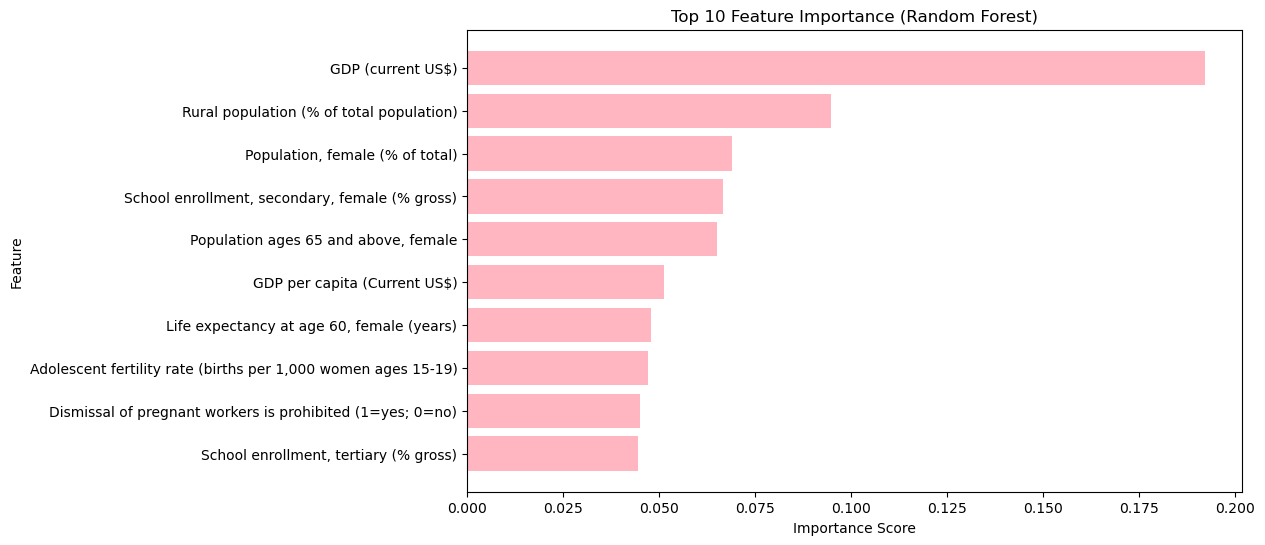

In [23]:
# Obtain the feature importance from the trained Random Forest model
feature_importance_rf = random_forest.feature_importances_

# Sort feature importance in descending order and pick the top 10
sorted_indices_rf = feature_importance_rf.argsort()[::-1] 
top_10_indices_rf = sorted_indices_rf[:10]


# Define custom colors for the bar plot
colors = ['#FFB6C1']

# Plot the top 10 importances for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(range(10, 0, -1), feature_importance_rf[top_10_indices_rf[::-1]], tick_label=X_train.columns[top_10_indices_rf[::-1]], color=colors)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


## Conclusions:

Regarding my question which addresses the relationship between socio-economic factors and the share of female STEM graduates over time, the models' relatively low performance shows that the selected predictors may not adequately capture the complexity of this relationship. On further analysis, it may be possible that there are limitations of the dataset when it comes to my question. For the future, I would possibly include additional predictors or exploring alternative modeling approaches, which would capture underlying factors to understand and predict future trends in female STEM participation like variables related to educational policies, cultural attitudes towards women in STEM.

When you look at the feature Importance it shows that GDP and rural population play an important role as socio economic factors. GDP being of high importance suggests that economic prosperity plays a significant role in shaping opportunities for women in STEM. Countries with higher GDP may have more resources allocated to education, infrastructure, and research, thereby facilitating greater participation of women in STEM fields. Additionally, higher GDP may correlate with greater societal openness and inclusivity, which can encourage women to pursue careers in traditionally male-dominated fields like STEM. For Rural population, rural areas often face unique challenges such as limited access to educational resources, infrastructure, and job opportunities. Women in rural areas may encounter additional barriers to accessing STEM education and career pathways compared to their urban counterparts. Addressing the needs of rural communities is essential for promoting gender diversity in STEM fields. Finally, the importance of school enrollment underscores the importance of early education in fostering interest and participation in STEM among women. Higher rates of school enrollment, especially in STEM-related fields, indicate a positive trajectory for increasing the representation of women in STEM. Efforts to improve access to quality education, promote STEM awareness, and provide supportive learning environments can contribute to narrowing the gender gap in STEM enrollment and graduation rates.

## References

1. Lab 3 Solutions
2. Lab 6 Solutions
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
4. Lab 8 Solutions
5. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
6. HW1
